In [23]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np


In [24]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [25]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [26]:
classlables = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [27]:
print(classlabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'hair drier', 'toothbrush']


In [28]:
print(len(classlabels))

74


In [29]:
model.setInputSize(480, 480)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0x7fc3143ea210>

#Read an Image:


In [30]:
img = cv2.imread('audi.jfif')

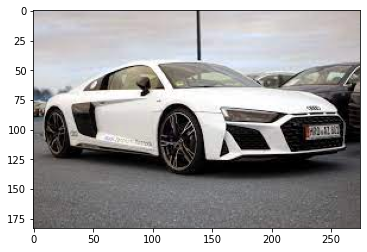

In [31]:
plt.imshow(img) #bgr -> rgb

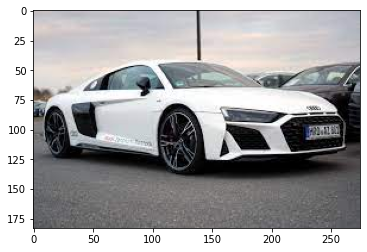

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [33]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [34]:
print(ClassIndex)

[3 3 3 3 3 1 3]


In [35]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classlabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness = 2)

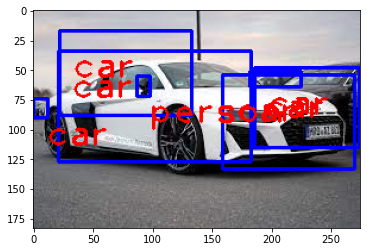

In [36]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


#Read a video:


In [37]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raiseIOError("Cannot open the video 😦 ")

font_scale = 0.8
font = cv2.FONT_HERSHEY_COMPLEX

while True:

    ret, frame = cap.read()

    ClassIndex, confidece, bbox = model.detect(frame, confThreshold = 0.55)
    # print(ClassIndex)
    if(len(ClassIndex) !=0 ):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):

            if(ClassInd <= 80):
               cv2.rectangle(frame, (boxes[0], boxes[1]), (boxes[2], boxes[3]), (0, 0, 255), 1)
               cv2.putText(frame, f"{classlabels[ClassInd-1]}: {str(round(conf, 2))}", (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0, 0, 255), thickness = 1)

    frame = cv2.resize(frame, (1300, 800), cv2.INTER_LINEAR)
    cv2.imshow("Object Detected 🙂 ", frame)
    if cv2.waitKey(2) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: ignored